<a href="https://colab.research.google.com/github/guen-a-park/Parcel-locker-Innov/blob/main/(%EC%A3%BC%ED%83%9D%EA%B0%80_%EA%B8%B0%EC%A4%80_%EB%B0%B0%EC%86%A1_%EB%82%9C%EC%9D%B4%EB%8F%84_%2C%EB%AC%B4%EC%9D%B8%ED%83%9D%EB%B0%B0%ED%95%A8%EA%B0%9C%EC%88%98)clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install plotly
!pip install chart_studio
import chart_studio
chart_studio.tools.set_credentials_file(username='', api_key='')
import chart_studio.plotly as py
import plotly.express as px

     |████████████████████████████████| 64 kB 1.4 MB/s 


# **Visualize data points**

In [ ]:
import os.path
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
 
#한글깨지는 문제
!apt-get update -qq
!apt-get install fonts-nanum* -qq
import matplotlib.font_manager as fm
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
plt.rc('font', family=font_name)
fm._rebuild()


Selecting previously unselected package fonts-nanum.
(Reading database ... 155047 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive

In [ ]:
#근아 경로
%cd /content/drive/MyDrive/공공 빅데이터 분석 공모전/clustering

/content/drive/MyDrive/공공 빅데이터 분석 공모전/clustering


In [ ]:
#csv 읽어오기
data = pd.read_csv('clustering_example_4.csv',engine='python',encoding='CP949')
# data = data.drop(index=365, axis=0)
# data = data.head(424) #무인택배함개수 이상치 역삼동 제거
data

,동,배송어려움정도,무인택배함개수
0,서울특별시 종로구 사직동,0.168473,0.090909
1,서울특별시 종로구 삼청동,0.149564,0.000000
2,서울특별시 종로구 부암동,0.473959,0.000000
3,서울특별시 종로구 평창동,0.902926,0.000000
4,서울특별시 종로구 무악동,0.019806,0.181818
...,...,...,...
419,서울특별시 강동구 둔촌1동,0.000000,0.000000
420,서울특별시 강동구 둔촌2동,0.168147,0.090909
421,서울특별시 강동구 암사1동,0.355123,0.181818
422,서울특별시 강동구 천호2동,0.441112,0.363636


In [ ]:
#clustering 위해 동이름 제거
data_cluster = data[['배송어려움정도','무인택배함개수']]
data_cluster = data_cluster.rename(columns = {'배송어려움정도':'주택가 기준 배송 난이도','무인택배함개수':'무인택배함 공급량'})
data_cluster

,주택가 기준 배송 난이도,무인택배함 공급량
0,0.168473,0.090909
1,0.149564,0.000000
2,0.473959,0.000000
3,0.902926,0.000000
4,0.019806,0.181818
...,...,...
419,0.000000,0.000000
420,0.168147,0.090909
421,0.355123,0.181818
422,0.441112,0.363636


Text(0, 0.5, 'number of boxes')

findfont: Font family ['NanumGothic Eco'] not found. Falling back to DejaVu Sans.


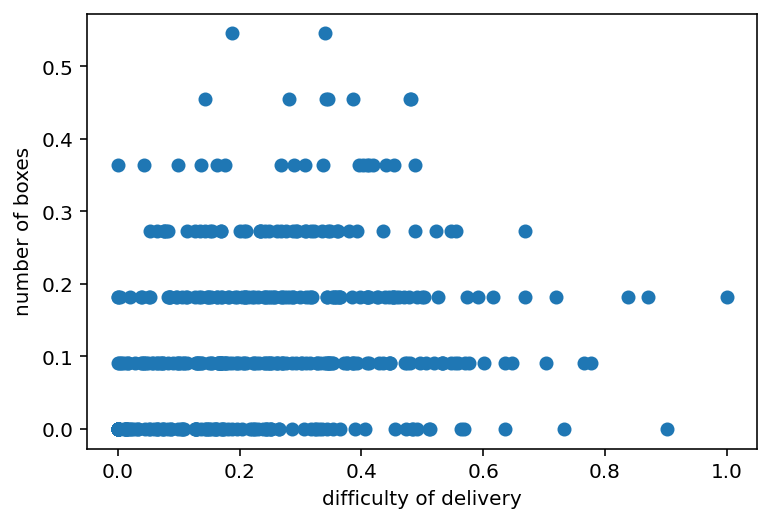

In [ ]:
#데이터 시각화
plt.scatter(data['배송어려움정도'],data['무인택배함개수'])
plt.xlabel('difficulty of delivery')
plt.ylabel('number of boxes')
#plt.title('단순 시각화')

In [ ]:
#data type numpy로 바꾸기
data_np_cluster = pd.DataFrame(data_cluster).to_numpy()
data_np_cluster


# **Elbow Method**
for dermining the optimal numbers of cluster in K-means clustering

In [ ]:
# Import required packages

from sklearn.cluster import KMeans


In [ ]:
#바로 csv 불러오기

In [ ]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_np_cluster)
    Sum_of_squared_distances.append(km.inertia_)

findfont: Font family ['NanumGothic Eco'] not found. Falling back to DejaVu Sans.


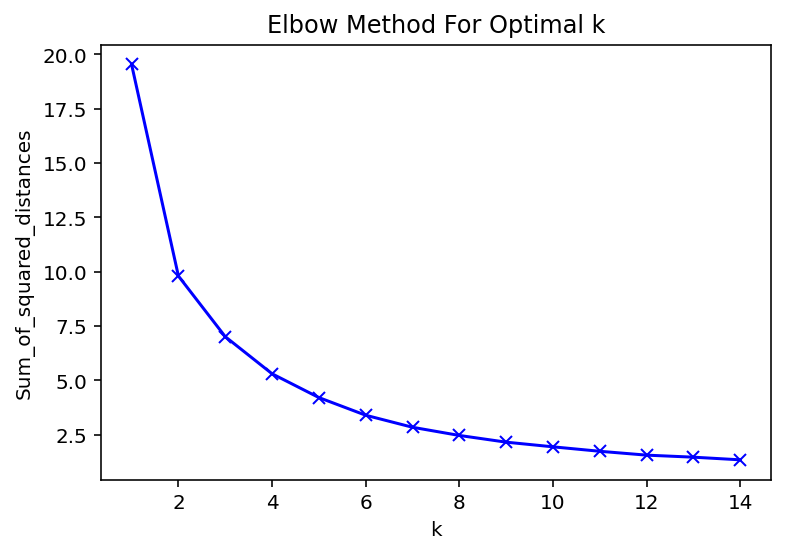

'\n그래프가 꺾이는 모양이 팔꿈치 같아 Elbow method라고 불린다.\n그림상 3 or 4\n'

In [ ]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

"""
그래프가 꺾이는 모양이 팔꿈치 같아 Elbow method라고 불린다.
그림상 3 or 4
"""

# **Spectral Clustering**

cluster index
(array([  4,   5,   7,  10,  12,  17,  18,  19,  20,  22,  23,  25,  26,
        31,  37,  38,  39,  45,  52,  53,  54,  55,  59,  62,  64,  87,
       106, 110, 111, 118, 119, 131, 132, 140, 146, 149, 153, 156, 158,
       159, 162, 164, 165, 169, 170, 171, 173, 174, 187, 195, 198, 200,
       206, 218, 221, 222, 231, 232, 233, 234, 236, 237, 240, 241, 243,
       250, 251, 252, 260, 261, 262, 267, 275, 282, 286, 296, 303, 335,
       341, 343, 345, 347, 348, 350, 358, 362, 363, 367, 368, 370, 372,
       373, 375, 378, 382, 387, 390, 394, 396, 397, 399, 400, 401, 402,
       403, 405, 406, 408, 409, 410, 412, 413, 419]),)
구성요소 개수 : 113
각각의 평균 출력
0.050417016185840706
0.049879324265486726
cluster index
(array([  3,  47,  86, 101, 107, 116, 125, 129, 136, 138, 139, 142, 205,
       270, 272]),)
구성요소 개수 : 15
각각의 평균 출력
0.7454505937333333
0.12121212133333333
cluster index
(array([  0,   1,   2,   6,   8,   9,  11,  13,  15,  16,  24,  27,  30,
        32,  33,  35,  41,  42, 

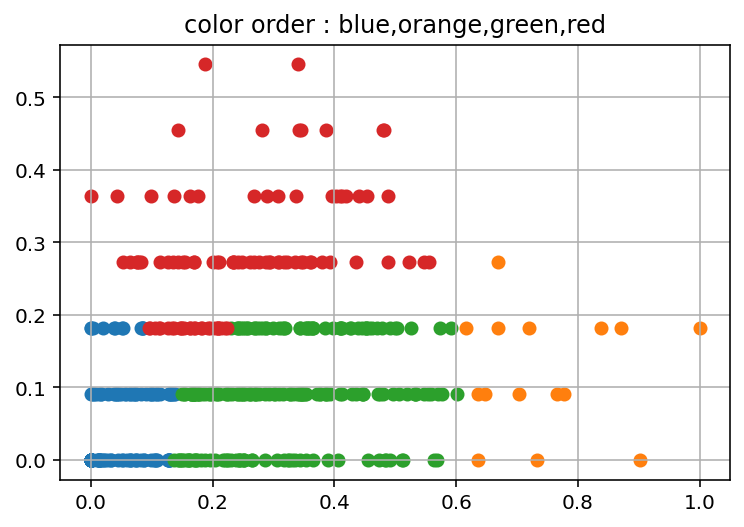

In [ ]:
# spectral clustering
from numpy import unique
from numpy import where
from sklearn.cluster import SpectralClustering

# define the model
model = SpectralClustering(n_clusters=4) #cluster 개수 조정,n_clusters=3
# fit model and predict clusters
yhat = model.fit_predict(data_np_cluster)
# retrieve unique clusters
clusters = unique(yhat)


#yhat pd에 추가하기
df = pd.DataFrame(yhat, columns = ['cluster'])
data_plot = pd.concat([data_cluster,df], axis=1)

fig = px.scatter(data_plot, x="주택가 기준 배송 난이도", y="무인택배함 공급량",color = "cluster", symbol="cluster",width=800, height=600)

fig.update(layout_showlegend=False,layout_coloraxis_showscale=False, layout_font=dict(
        family="Arial",
        size=18,
        color="Black"
    ))

fig.show()

# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    print("cluster index")
    print(row_ix)
    print("구성요소 개수 :", data_np_cluster[row_ix, 0].size)
    print("각각의 평균 출력")
    print(data_np_cluster[row_ix, 0].mean())
    print(data_np_cluster[row_ix, 1].mean())
    # create scatter of these samples
    plt.scatter(data_np_cluster[row_ix, 0], data_np_cluster[row_ix, 1])


# show the plot
plt.title("color order : blue,orange,green,red") 
plt.grid()
plt.show()


# **Gaussian Mixture Clustering**

cluster index
(array([  6,   8,   9,  11,  27,  33,  41,  42,  49,  50,  58,  60,  61,
        63,  65,  68,  71,  72,  74,  76,  80,  81,  82,  83,  88,  89,
        90,  92,  93,  94,  95,  96,  97,  98, 102, 103, 104, 112, 113,
       115, 117, 120, 121, 127, 128, 134, 143, 145, 147, 151, 163, 167,
       168, 177, 180, 181, 182, 185, 186, 190, 193, 203, 212, 215, 216,
       227, 228, 242, 244, 245, 247, 256, 258, 266, 271, 273, 280, 285,
       292, 294, 295, 297, 300, 302, 310, 311, 314, 315, 317, 318, 322,
       324, 326, 328, 334, 339, 349, 355, 360, 376, 383, 384, 389, 391,
       414, 415, 417, 421]),)
구성요소 개수 : 108
각각의 평균 출력
0.30672607563888893
0.08838383847222221
cluster index
(array([  2,   3,  15,  16,  32,  43,  44,  47,  66,  70,  79,  84,  85,
        86,  91, 101, 107, 108, 109, 116, 122, 123, 125, 126, 129, 130,
       133, 135, 136, 137, 138, 139, 141, 142, 148, 155, 172, 189, 191,
       201, 205, 220, 239, 270, 272, 274, 278, 279, 283, 291, 298, 304,
       307, 

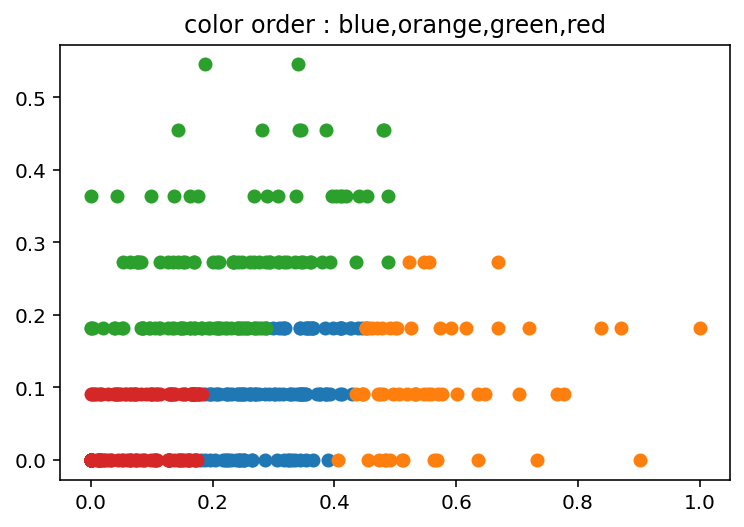

In [ ]:
# gaussian mixture clustering
from numpy import unique
from numpy import where
from sklearn.mixture import GaussianMixture

# define the model
model = GaussianMixture(n_components=4) #cluster 개수 조정, n_components=2
# fit the model
model.fit(data_np_cluster)

# assign a cluster to each example
yhat = model.predict(data_np_cluster)
# retrieve unique clusters
clusters = unique(yhat)


#yhat pd에 추가하기
df = pd.DataFrame(yhat, columns = ['cluster'])
data_plot = pd.concat([data_cluster,df], axis=1)

fig = px.scatter(data_plot, x="주택가 기준 배송 난이도", y="무인택배함 공급량",color = "cluster", symbol="cluster",width=800, height=600)

fig.update(layout_showlegend=False,layout_coloraxis_showscale=False, layout_font=dict(
        family="Arial",
        size=18,
        color="Black"
    ))

fig.show()

# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    #print(row_ix)
    # create scatter of these samples
    print("cluster index")
    print(row_ix)
    print("구성요소 개수 :", data_np_cluster[row_ix, 0].size)
    print("각각의 평균 출력")
    print(data_np_cluster[row_ix, 0].mean())
    print(data_np_cluster[row_ix, 1].mean())
    # create scatter of these samples
    plt.scatter(data_np_cluster[row_ix, 0], data_np_cluster[row_ix, 1])

#show the plot
plt.title("color order : blue,orange,green,red") 
plt.show()


# **K-Medoids Clustering**

     |████████████████████████████████| 1.7 MB 31.0 MB/s 
     |████████████████████████████████| 23.1 MB 55.7 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


[[0.3018991  0.09090909]
 [0.16904393 0.09090909]
 [0.45700546 0.18181818]
 [0.04287228 0.09090909]]


cluster index
(array([ 11,  27,  33,  40,  41,  46,  49,  56,  60,  63,  68,  71,  72,
        76,  77,  81,  82,  88,  92,  93,  95,  97, 102, 103, 104, 112,
       113, 117, 120, 121, 124, 134, 145, 147, 151, 152, 168, 175, 180,
       181, 184, 186, 190, 193, 194, 207, 211, 212, 215, 220, 223, 227,
       228, 242, 244, 247, 249, 255, 256, 258, 269, 271, 280, 292, 294,
       295, 297, 299, 302, 306, 314, 315, 318, 322, 323, 324, 325, 326,
       327, 328, 332, 334, 339, 349, 352, 355, 356, 360, 374, 383, 384,
       415, 417]),)
구성요소 개수 : 93
각각의 평균 출력
0.3002514423870968
0.10948191604301077
cluster index
(array([  0,   1,   6,   7,   8,   9,  10,  13,  14,  21,  24,  25,  29,
        30,  34,  35,  36,  37,  42,  45,  48,  50,  51,  55,  57,  62,
        74,  75,  78,  80,  87,  96,  98, 105, 114, 119, 131, 144, 150,
       156, 157, 160, 161, 163, 166, 167, 182, 183, 188, 192, 200, 203,
       208, 209, 213, 216, 218, 219, 224, 225, 229, 230, 235, 245, 246,
       253, 259, 263, 26

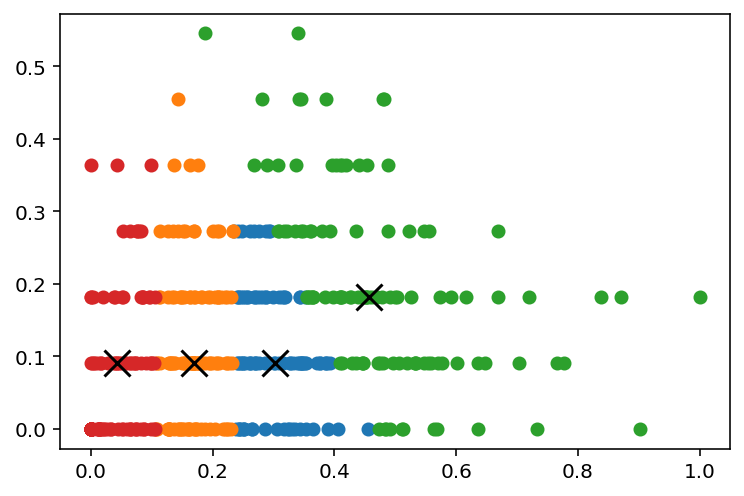

In [ ]:
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids


model = KMedoids(n_clusters=4, random_state=0).fit(data_np_cluster)
centroids = model.cluster_centers_
print(centroids)
# assign a cluster to each example
yhat = model.predict(data_np_cluster)
# retrieve unique clusters
clusters = unique(yhat)

#yhat pd에 추가하기
df = pd.DataFrame(yhat, columns = ['cluster'])
data_plot = pd.concat([data_cluster,df], axis=1)

fig = px.scatter(data_plot, x="주택가 기준 배송 난이도", y="무인택배함 공급량",color = "cluster", symbol="cluster",width=800, height=600)

fig.update(layout_showlegend=False,layout_coloraxis_showscale=False, layout_font=dict(
        family="Arial",
        size=18,
        color="Black"
    ))

fig.show()

# create scatter plot for samples from each cluster
i =0
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    #print(row_ix)
    # create scatter of these samples
    print("cluster index")
    print(row_ix)
    print("구성요소 개수 :", data_np_cluster[row_ix, 0].size)
    print("각각의 평균 출력")
    print(data_np_cluster[row_ix, 0].mean())
    print(data_np_cluster[row_ix, 1].mean())
    # create scatter of these samples
    plt.scatter(x = data_np_cluster[row_ix, 0], y =data_np_cluster[row_ix, 1])   
    plt.scatter(centroids[i, 0],centroids[i, 1],s=169,c = 'black',marker="x")
    i = i+1

# #show the plot
# plt.title("color order : blue,orange,green,red") 
# pyplot.show()


# **최종 입지 선정 및 변인 값 비교**

In [ ]:
#합집합 구하기
list1 = [  3,  47,  86, 101, 107, 116, 125, 129, 136, 138, 139, 142, 205,
       270, 272]

list2 = [  6,   8,   9,  11,  27,  33,  41,  42,  49,  50,  58,  60,  61,
        63,  65,  68,  71,  72,  74,  76,  80,  81,  82,  83,  88,  89,
        90,  92,  93,  94,  95,  96,  97,  98, 102, 103, 104, 112, 113,
       115, 117, 120, 121, 127, 128, 134, 143, 145, 147, 151, 163, 167,
       168, 177, 180, 181, 182, 185, 186, 190, 193, 203, 212, 215, 216,
       227, 228, 242, 244, 245, 247, 256, 258, 266, 271, 273, 280, 285,
       292, 294, 295, 297, 300, 302, 310, 311, 314, 315, 317, 318, 322,
       324, 326, 328, 334, 339, 349, 355, 360, 376, 383, 384, 389, 391,
       414, 415, 417, 421]

union2 = list(set(list1) | set(list2))
print( union2 ) #합집합

[256, 258, 3, 6, 8, 9, 266, 11, 270, 271, 272, 273, 280, 27, 285, 33, 292, 294, 295, 41, 42, 297, 300, 302, 47, 49, 50, 310, 311, 58, 314, 60, 61, 315, 63, 317, 65, 318, 322, 68, 324, 326, 71, 72, 328, 74, 76, 334, 80, 81, 82, 83, 339, 86, 88, 89, 90, 92, 93, 94, 95, 96, 97, 98, 349, 355, 101, 102, 103, 104, 360, 107, 112, 113, 115, 116, 117, 120, 121, 376, 125, 127, 128, 129, 383, 384, 389, 134, 391, 136, 138, 139, 142, 143, 145, 147, 151, 414, 415, 417, 163, 421, 167, 168, 177, 180, 181, 182, 185, 186, 190, 193, 203, 205, 212, 215, 216, 227, 228, 242, 244, 245, 247]


In [ ]:
len(union2)

123

In [ ]:
union2 = [256, 258, 3, 6, 8, 9, 266, 11, 270, 271, 272, 273, 280, 27, 285, 33,
          292, 294, 295, 41, 42, 297, 300, 302, 47, 49, 50, 310, 311, 58, 314, 60,
          61, 315, 63, 317, 65, 318, 322, 68, 324, 326, 71, 72, 328, 74, 76, 334, 80,
          81, 82, 83, 339, 86, 88, 89, 90, 92, 93, 94, 95, 96, 97, 98, 349, 355, 101, 
          102, 103, 104, 360, 107, 112, 113, 115, 116, 117, 120, 121, 377, 125, 127, 128, 
          129, 384, 385, 390, 134, 392, 136, 138, 139, 142, 143, 145, 147, 151, 415, 416, 418,
          163, 422, 167, 168, 177, 180, 181, 182, 185, 186, 190, 193, 203, 205, 212, 215, 216, 
          227, 228, 242, 244, 245, 247]

In [ ]:
#최종 교집합 구하기
union1 = [24, 25, 26, 28, 29, 30, 44, 46, 47, 48, 49, 51, 54, 56, 57, 58, 62, 63, 66, 67, 68, 70, 72, 73, 74, 76, 77, 79, 88, 89, 107, 108, 126, 128, 130, 135, 137, 142, 147, 151, 156, 158, 159, 174, 175, 191, 201, 205, 216, 217, 218, 220, 239, 241, 243, 244, 248, 250, 251, 252, 254, 257, 258, 262, 263, 264, 266, 269, 272, 273, 277, 278, 279, 280, 281, 284, 285, 287, 288, 290, 305, 307, 308, 309, 310, 313, 317, 324, 334, 337, 339, 341, 342, 344, 346, 355, 360, 362, 364, 365, 366, 372, 374, 375, 377, 381, 387, 390, 392, 393, 394, 398, 399, 415, 416, 422, 423, 424]

#지금 union2가 문제..
intersection = list(set(union1) & set(union2))
print( intersection ) 

[128, 258, 390, 392, 266, 142, 272, 273, 147, 151, 280, 285, 415, 416, 422, 47, 49, 310, 58, 317, 63, 68, 324, 72, 74, 76, 205, 334, 339, 88, 89, 216, 355, 360, 107, 244, 377]


In [ ]:
len(intersection)

37

In [ ]:
#csv 읽어오기
result = pd.read_csv('clustering최종.csv',engine='python',encoding='CP949')
#최종 교집합 목록 뽑기
final = result.loc[intersection,:]
final

,동,배송어려움정도,택배개수,1인가구비율,무인택배함개수
128,서울특별시 성북구 종암동,0.438993,0.452020,0.406401,0.181818
258,서울특별시 강서구 화곡1동,0.351862,0.550013,0.513145,0.181818
390,서울특별시 송파구 송파1동,0.187383,0.461994,0.510476,0.090909
392,서울특별시 송파구 석촌동,0.222512,0.530414,0.540254,0.090909
266,서울특별시 구로구 고척2동,0.409487,0.511147,0.310240,0.181818
142,서울특별시 강북구 인수동,0.720271,0.476749,0.358350,0.181818
272,서울특별시 구로구 구로2동,0.776836,0.443265,0.475195,0.090909
273,서울특별시 구로구 개봉1동,0.427663,0.581254,0.303048,0.181818
147,서울특별시 도봉구 방학1동,0.354145,0.663155,0.352393,0.000000
151,서울특별시 도봉구 창2동,0.241014,0.544135,0.282261,0.090909


In [ ]:
#전체 데이터의 4개 변인 평균
print(result['배송어려움정도'].mean())
print(result['택배개수'].mean())
print(result['1인가구비율'].mean())
print(result['무인택배함개수'].mean())

0.24697770086352938
0.4220513955439997
0.4067012308407056
0.12748663110517652


In [ ]:
#target 지역 4개 변인 평균
print(final['배송어려움정도'].mean())
print(final['택배개수'].mean())
print(final['1인가구비율'].mean())
print(final['무인택배함개수'].mean())

0.3835485171621622
0.5022170583243243
0.440641916945946
0.11793611801351353
